# Random matrices: homework 1 due September 11, 2019


# Goal -- set up a Julia laboratory for many experiments to come

# (see piazza for those wanting to do all math theory)

(a video of how to do this homework will be setup this weekend)

Submit this notebook via Gradescope; instructions to follow.

#### Exercise 1 (Set-up)

(1.)  Follow the detailed instructions [here](https://github.com/mitmath/julia-mit) to:

  - Download the current stable version (1.2) of Julia for your machine from [here](https://julialang.org/downloads) and install it. 

  - Run the Julia executable.    
    
  - Install the IJulia package that provides an interface to the Jupyter notebook.
    
  - Run IJulia by typing `using IJulia; notebook()` at the Julia prompt.
    
(2a.) (If you know about github or want to learn go to 2b).  You can download the hw easily
from [here](https://nbviewer.jupyter.org/github/mitmath/18338/blob/master/HW/Random%20matrices%20HW1.ipynb) by
right clicking on the icon on the upper right and do "save link as" or equivalent.

(2b.) Alternatively -- -Clone a copy of this repository to your machine using `git clone https://github.com/mitmath/18338.git` from a terminal, or alternatively using a visual git client like GitKraken. 

 


(3.) Open the homework 1 notebook. Make a copy of the notebook using `File->Make a copy` from the `File` menu. Change the name of the copy to add your name as in HW1.alan_edelman.ipynb

(4) Figure out how to enter 1+1 in a cell in Jupyter and get 2 with SHIFT + ENTER.  Stay tuned: a video may come soon.



#### Exercise 2 (Distributions with examples of how to draw nice pictures with Julia)

(1). Follow the instructions [here](https://juliastats.github.io/Distributions.jl/stable/starting/) to create a standard normal distribution object and draw 1000 samples from it using the `Distributions.jl` package.




In [ ]:
]add Distributions
# Do this once to load the package

In [2]:
using Random, Distributions
d = Normal()
x = rand(d,5) # change 5 to 1000

5-element Array{Float64,1}:
  1.3267756038731997 
 -0.9602853854579975 
  0.20008223390853155
 -0.0602949808231453 
  0.6160492263433986 

(2). Use the `histogram` command from the `Plots.jl` package to draw a histogram of the result, using the `normalize=true` keyword argument to normalize the result to area 1.
You can fix the number of histogram bins with the `bins=` keyword argument.

<br>
Warning: plots takes forever the first time it compiles 


In [ ]:
]add Plots  # comment after first time

In [8]:
using Plots

In [ ]:
# draw a histogram plot, which requires the keyword argument "bins" if you wish to specify the bins
r = rand(d,10^5)
Plots.histogram(r, normalize = true, bins = -3:.1:3, legend = false)

In [ ]:
]add StatsBase # comment after first time

In [ ]:
using StatsBase

In [ ]:
h = fit(Histogram, r,  -3:.1:3) # create a histogram object with counts

In [ ]:
Plots.bar(h.edges,h.weights/Float64(h.edges[1].step)/length(r), legend=false) # normalize to have area = 1

In [ ]:
#  Have Julia normalize for you
h = StatsBase.normalize( fit(Histogram, r,  -3:.1:3) , mode = :pdf)

In [ ]:
Plots.bar(h.edges, h.weights, legend=false, bar_width = .05) # or even a bar chart which has spaces betwen the bars

In [ ]:
Plots.bar(h.edges,h.weights, fillcolor = :yellow, bar_width = .05, legend=false)  # make the color yellow

In [ ]:
Plots.bar(h.edges,h.weights, fillcolor = RGB(1,1,0), bar_width = .05, legend=false) # your own r,g,b value

(3.) Use the `plot!` command to draw the exact PDF of the distribution on top.


In [ ]:
plot!( x-> exp(-x^2/2)/√(2π),-3,3, color=:red, lw=7)

(4.) Use the function `pdf` from the `Distributions.jl` package to do the same, without needing to explicitly type the formula for the PDF.

In [ ]:
plot!( x->pdf(d,x), -3,3, color=:white, lw=2)

(5.) Use the `@manipulate` command from the `Interact.jl` package to interactively change the number of samples used for the histogram.  (unfortunately @manipulate may be flaky, don't sweat it)

In [ ]:
using Interact

In [ ]:
@manipulate for n = 10 .^ [1,2,3,4,5,6]
    r = rand(Normal(),n)
    h = StatsBase.normalize( fit(Histogram, r,  -3:.1:3) , mode = :pdf)
    Plots.bar(h.edges,h.weights, fillcolor = :yellow, bar_width = .05, legend=false)
    plot!( x->pdf(d,x), -3,3, color=:red, lw=2, ylim=(0,.5))
end
 

(6.) Repeat the above steps for the chi distribution with "2.8 degrees of freedom". How could you generalize this for any distribution?

In [ ]:
@manipulate for n = 10 .^ [1,2,3,4,5,6]
    d = Chi(2.8)
    r = rand(d,n)
    h = StatsBase.normalize( fit(Histogram, r,  0:.1:4) , mode = :pdf)
    Plots.bar(h.edges,h.weights, fillcolor = :yellow, bar_width = .05, legend=false)
    plot!( x->pdf(d,x), 0,4, color=:red, lw=2, ylim=(0,.8))
end

#### Exercise 3 (Eigenvalues of symmetric random matrices; the semicircle law)

(1.) Generate a random gaussian matrix of size $n \times n$.  

In [3]:
using LinearAlgebra

In [4]:
n = 1000
A = rand(Normal(),n,n)


1000×1000 Array{Float64,2}:
 -1.91765    -0.177754   -0.263657   …   0.352466   -0.374797  -1.56933  
  1.9222      0.984261   -0.294729      -0.608295    0.91985    1.31796  
  0.0568445  -0.242979    0.340973      -1.77787     1.05227   -1.44632  
  2.3816     -0.397388    1.1275         0.0298367  -0.525603  -0.344627 
 -0.615663    0.260666   -0.364069       0.46258     0.534053   2.06017  
 -0.604155    1.49553     0.256875   …   0.606761    0.181697   1.27164  
  0.752223   -0.0204558   2.32619       -0.615223   -0.329378   0.89823  
 -0.0101043  -0.81817    -0.556419      -0.0232528   0.84773    1.28921  
  0.252125   -0.282185    0.679111       0.12951    -0.641344  -0.879985 
 -0.414252   -1.31659     0.51657       -0.448883    2.29642    0.539316 
  1.26602     0.831004   -0.278815   …  -0.406873   -0.361041  -0.330906 
  0.322489    1.37807    -0.307239       0.565398    0.543032   1.20623  
  1.26693    -0.168923   -0.0657613     -0.7942      1.15843    1.27414  
  ⋮       

(2.) Symmetrize the matrix using the transpose operator `'`  (apostrophe) and `+` , and then create a version of type `Symmetric`.

In [5]:
A = Symmetric((A+A')/2)

1000×1000 Symmetric{Float64,Array{Float64,2}}:
 -1.91765     0.872222   -0.103406  …   1.21218     0.130818   -1.12949 
  0.872222    0.984261   -0.268854     -0.107651    0.425513    1.81659 
 -0.103406   -0.268854    0.340973     -0.511885    0.106128   -0.7357  
  0.776146   -0.280198   -0.348875     -0.147757   -0.938251   -0.200473
 -1.16531    -0.437223   -0.440841      0.425516   -0.132761    1.30023 
 -0.552667    1.17822    -0.584749  …   0.412553   -0.681843    0.237545
  0.563704    0.506931    0.924274     -0.186411   -0.870301   -0.126821
  0.178528    0.346726   -0.867763      0.602625   -0.177575    0.687701
  1.15093     0.146228   -0.545978      0.28077     0.465093   -0.358766
  0.124495   -1.46252    -0.132694     -0.373964    1.33558    -0.170782
  1.15974     0.352203    0.205755  …   0.0177435   0.09091    -0.683794
  0.056306    0.570173   -0.466748      0.372706    0.156628    1.33026 
 -0.0605712  -0.569285   -0.840449      0.0194001   0.063199    1.2571  
  ⋮ 

(3.) Use `eigvals` from the `LinearAlgebra` standard library to calculate the eigenvalues of the matrix.  (NB: Standard libraries do *not* need to be installed; they come together with the Julia installation.)

In [24]:
n = 2000
A = rand(Normal(),n,n)
A = Symmetric(A+A')
λ = eigvals(A)/√(2n);

(4.) Histogram the eigenvalues to see the semicircle law. 

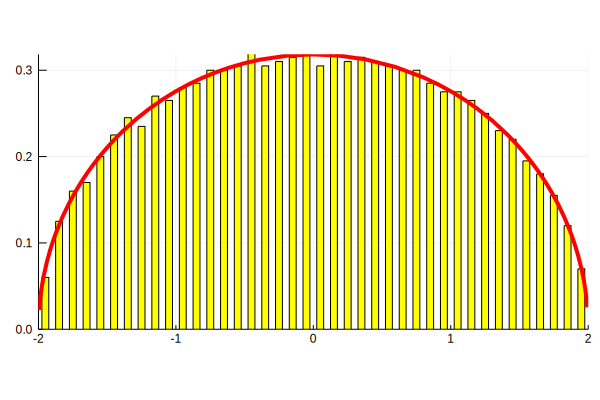

In [61]:
Plots.histogram(λ, normalize = true, color=:yellow, bins = -3:.1:3,  bar_width=.05, legend = false)

plot!(x->sqrt(4-x^2)/2π, -2,2, color=:red, lw=4, xlim=(-2,2), ylim=(0,1/π), aspect_ratio=2π)

(5.) Use e.g. `append!` to combine the results from many runs into a single data vecxtor. Histogram the data you have collected, and compare it to the exact result (semicircle law).


In [100]:
 GOE(n) = (A = rand(Normal(),n,n); Symmetric(A+A'))
 
 t = 3000
 n = 50
 λ = Float64[]
 for i=1:t
     append!(λ, eigvals(GOE(n)))
 end
 λ ./= √(2n);

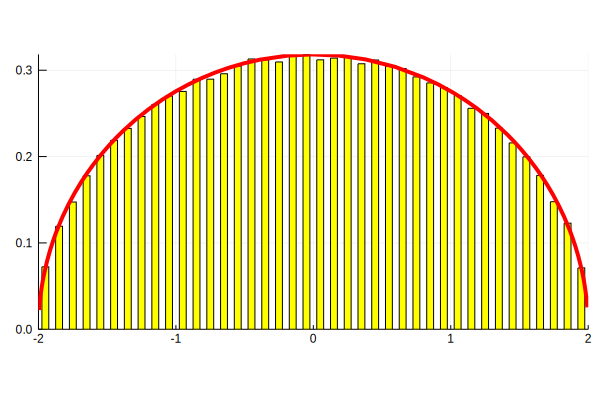

In [101]:
Plots.histogram(λ, normalize = true, color=:yellow, bins = -3:.1:3,  bar_width=.05, legend = false)
plot!(x->sqrt(4-x^2)/2π, -2,2, color=:red, lw=4, xlim=(-2,2), ylim=(0,1/π), aspect_ratio=2π)

(6.) Make an interactive visualization in which you can vary the number of trials and size of matrices. Comment on the results

#### Exercise 4 (Singular values)

1. Follow a similar approach as in exercise 3 to visualize the Marčenko-Pastur law on singular values of a rectangular matrix, using the `svdvals` function.

#### Exercise 5 (Generalized singular values)


1. Follow a similar approach as in exercise 3 to visualize the Wachter law on the generalized singular values of a matrix, using the `svdvals(A, B)` method.

#### (Optional)  Exercise 6 (Parallel computing) 

In this exercise we will parallelize a random matrix calculation in a simple way.


(1.) Install the `DistributedArrays.jl` package. 


(2.) Load the `Distributed.jl` stdlib package. Use the `addprocs` function to add 2 processes (assuming that you have a multicore machine).


(3.) Create a `DArray` ("distributed array") `d`, e.g. using the array comprehension syntax `d = @DArray [i for i in 1:2]`.


(4.) Define a function `f` that will run the simulation from exercise 3 and returns a data vector of data.  *Broadcast* this function over the `d` using the syntax `f.(d)`.
This should return a new `DArray`.


(5.) Broadcast `fit(Histogram, v)` from the `StatsBase` package over this result. This should give another `DArray`; call it `hists`.


(6.) Use the `reduce(merge, hists)` function to combine the two histograms into one.


(7.) Compare the total time taken for this parallel version to a serial version.